In [19]:
from IPython.display import clear_output
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import Adam

In [21]:
from nn_utils import AE_3D_200
from ae_utils import *

In [22]:
torch.cuda.is_available()

True

In [23]:
torch.backends.cudnn.enabled

True

In [24]:
PATH = 'data/4D/'
test_pickle = f'{PATH}all_jets_test_4D_100_percent.pkl'
train_pickle = f'{PATH}all_jets_train_4D_100_percent.pkl'

## Play with the dataset

In [25]:
train_df = pd.read_pickle(train_pickle)

In [26]:
train_df.shape

(111778, 4)

In [27]:
train_df.sample(5)

,m,pt,phi,eta
19433,14752.279297,103470.265625,0.538395,-2.567381
99891,5454.173828,23059.062500,-0.748665,0.893575
37622,15829.079102,113380.351562,-2.344535,-0.643641
6241,14892.981445,104429.929688,-3.054131,-3.203092
43133,5402.182129,28432.314453,2.431456,-2.968506


In [28]:
train_df_normalised = ((train_df - train_df.min())/(train_df.max() - train_df.min()))
train_df_normalised.sample(5)

,m,pt,phi,eta
97094,0.186917,0.281079,0.997971,0.665557
10307,0.121806,0.153059,0.892474,0.451173
7552,0.054470,0.066677,0.923325,0.550356
103984,0.078153,0.044000,0.330958,0.646063
80482,0.037857,0.007486,0.079606,0.381544


In [29]:
train_df_normalised.values.shape

(111778, 4)

## Initialise

In [30]:
# Hyperparameters
num_epochs = 100
batch_size = 128
weight_decay = 1e-6
learning_rate = 1e-4

In [31]:
# Ratio to split the dataset into Training and Validation sets
train_ratio = 0.8

# Initialise the datasets
tv_dataset = AllJetsDataset(train_pickle)

train_size = int(len(tv_dataset) * train_ratio)
validation_size = len(tv_dataset) - train_size
train_dataset, validation_dataset = random_split(tv_dataset, [train_size, validation_size])

# Initialise the test dataset
test_dataset = AllJetsDataset(test_pickle)

datasets = Datasets(train_dataset, validation_dataset, test_dataset)

In [32]:
# Initialise the model
autoencoder = AE_3D_200().cuda()

# Use a Mean Squared Error loss
loss_func = LossFunction(nn.MSELoss(), 'MSE')

# Use the Adam Optimiser
optimiser = Adam(autoencoder.parameters(), lr=learning_rate, weight_decay=weight_decay)

## Initialise Trainer

In [33]:
trainer = AE_Trainer(
    autoencoder=autoencoder, 
    datasets=datasets, 
    loss_func=loss_func, 
    optimiser=optimiser, 
    num_epochs=num_epochs,
    batch_size=batch_size)

## Train

In [34]:
trainer.train()

Training AE_3D_200 | Epoch: 100%|██████████| 100/100 [03:37<00:00,  2.17s/it, Train_Loss=0.00981, Validation_Loss=0.0131]


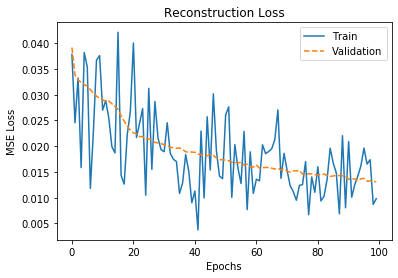

In [35]:
trainer.plot_reconstruction_loss()

## Test

In [36]:
trainer.test()

Test loss is:  0.01292662788182497


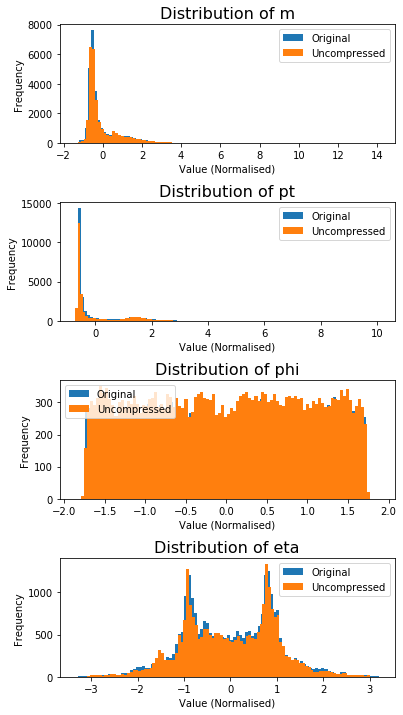

In [37]:
trainer.plot_test_reconstruction_distribution()

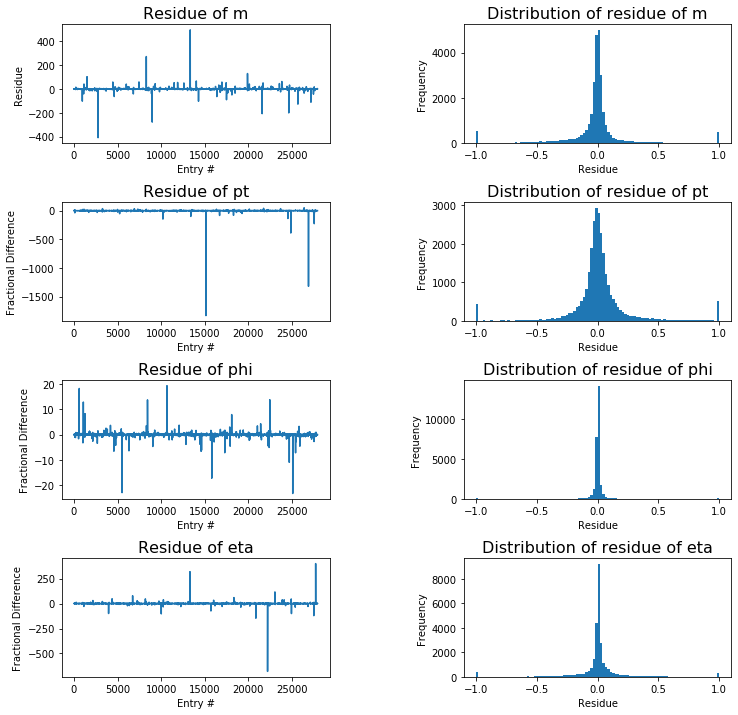

In [38]:
trainer.plot_test_residue_graphs()